<a href="https://colab.research.google.com/github/kesarsatyam/Machine-Learning-Project/blob/master/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Heart Disease Prediction**

**Reading Dataset**

In [48]:
import numpy as np # importing libraries
import pandas as pd
import seaborn as sns # visualisation librarry
import matplotlib.pyplot as plt
%matplotlib inline

import os

from keras.layers import Dense

import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

df=pd.read_csv('heart.csv')
print(df)


Using TensorFlow backend.


     age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1     37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2     41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3     56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4     57    0   0       120   354    0  ...      1      0.6      2   0     2       1
..   ...  ...  ..       ...   ...  ...  ...    ...      ...    ...  ..   ...     ...
298   57    0   0       140   241    0  ...      1      0.2      1   0     3       0
299   45    1   3       110   264    0  ...      0      1.2      1   0     3       0
300   68    1   0       144   193    1  ...      0      3.4      1   2     3       0
301   57    1   0       130   131    0  ...      1      1.2      1   1     3       0
302   57    0   1       130   236    0  ...      0      0.0      

**Rows and Column Information**

In [2]:
print(df.shape) # rows and column

(303, 14)


In [3]:
# TO checking all the columns of the data
print(df.columns) 

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [4]:
# To checking data types of the data
print(df.dtypes) 

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [5]:
#To checking any missing value in data
print(df.isnull().sum()) 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


We don't have any missing value in dataset

**Conclude Statical Data**

In [6]:
#The describe() method is used for calculating some statistical data like percentile, mean and std 
#of the numerical values of the Series or DataFrame. 
print(df.describe()) 

              age         sex          cp  ...          ca        thal      target
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000  303.000000
mean    54.366337    0.683168    0.966997  ...    0.729373    2.313531    0.544554
std      9.082101    0.466011    1.032052  ...    1.022606    0.612277    0.498835
min     29.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     47.500000    0.000000    0.000000  ...    0.000000    2.000000    0.000000
50%     55.000000    1.000000    1.000000  ...    0.000000    2.000000    1.000000
75%     61.000000    1.000000    2.000000  ...    1.000000    3.000000    1.000000
max     77.000000    1.000000    3.000000  ...    4.000000    3.000000    1.000000

[8 rows x 14 columns]


# GENDER INFORMATION

FEMALE:  96
MALE:  207


Text(0.5, 1.0, 'Distribution of age')

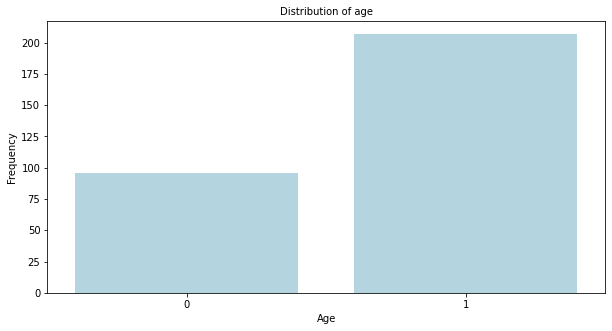

In [7]:
print("FEMALE: ",len(df[df['sex']==0])) #female = 0
print("MALE: ",len(df[df['sex']==1])) # male =1 

# we can also see in visualization

plt.figure(figsize=(10,5))
sns.countplot(df['sex'],color='lightblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of age', fontsize=10)

AS you can see in the plot females & males occurence

**DISTRIBUTION OF AGE**

Text(0.5, 1.0, 'Distribution of age')

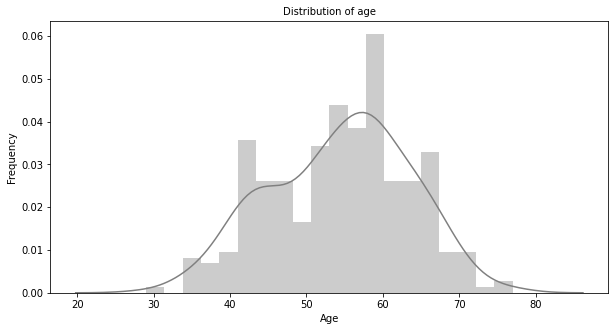

In [8]:

plt.figure(figsize=(10,5))
sns.distplot(df['age'], hist=True, bins=20, color='grey')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of age', fontsize=10)

As you can se in the age gap between 50-60 we have more pataint

**Visualization of data with one more feature for those who has chest pain (feature)**


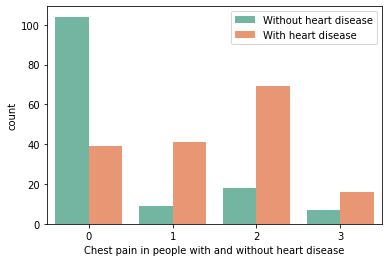

In [9]:
sns.countplot(data=df, x='cp', hue = 'target', palette= 'Set2')
plt.xlabel('Chest pain in people with and without heart disease')
plt.legend( loc='upper right', labels=['Without heart disease', 'With heart disease'])

**SCATTER PLOT of TAREGET data**

FEMALE:  138
MALE:  165


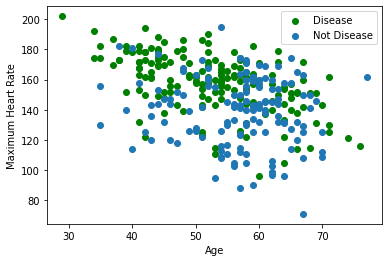

In [10]:
print("FEMALE: ",len(df[df['target']==0])) #female = 0
print("MALE: ",len(df[df['target']==1])) # male =1 
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="green")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

As you can see we have more cases of Males as compare to Females

**CORELATION IN DATA**

Put in plain terms, correlation is a measure of how strongly one variable depends on another.

Correlation is very important in the field of Psychology and Education as a measure of relationship between test scores and other measures of performance. With the help of correlation, it is possible to have a correct idea of the working capacity of a person.

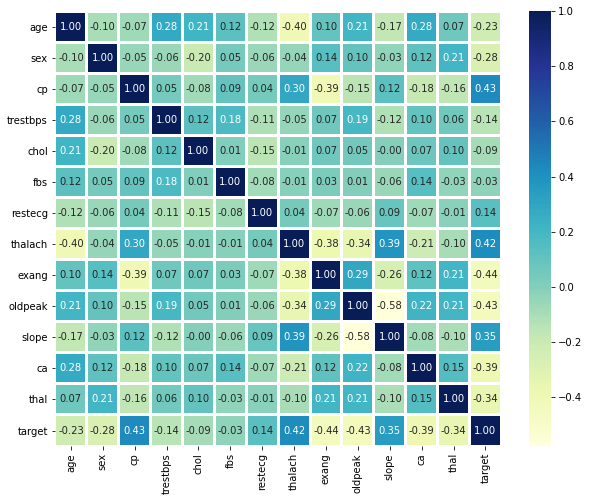

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',fmt='.2f',linewidths=2)
#No much of correlation

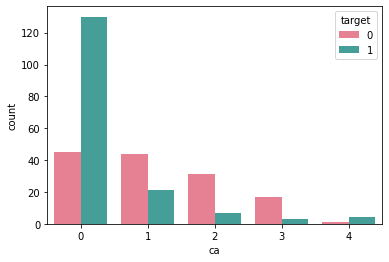

In [12]:
sns.countplot(x='ca',data=df,hue='target',palette='husl',linewidth=5)


**People with 'ca' as 0 have highest chance of heart disease** 

 Plotting the Rest Blood Pressure against age and comparison between sex

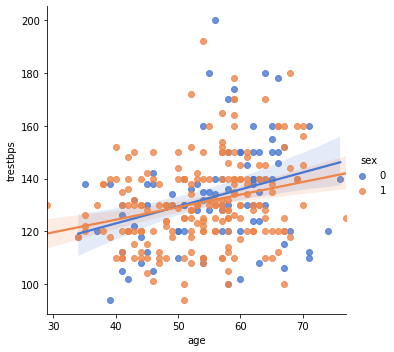

Correlation Coefficient:0.2793509065612883


In [13]:
sns.lmplot(x='age', y='trestbps', data=df, hue='sex', palette='muted')
plt.show()
print('Correlation Coefficient:{}'.format(np.corrcoef(df.age, df.trestbps)[0,1]))

There is a positive correlation between age and rest blood pressure. The Females tend to have slightly higher chance of high blood pressure than males post the age of 50

##TRAIN MODEL

In [113]:
# NOW lets build ML model
#At first we take our matix of features and target variable

# At this moment we have a dataframe that contains all of the heart.csv data. However we need to
# Separate them to [X, Y]. Where our target labels are 'Y', and 'X' is our training data.
X = df.drop(['target'],1)
Y= df['target']

# Now split to train/test with 80% training data, and 20% test data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Check dimensions of both sets.
print("Train Features Size:", X_train.shape)
print("Test Features Size:", X_test.shape)
print("Train Labels Size:", Y_train.shape)
print("Test Labels Size:", Y_test.shape)


Train Features Size: (242, 13)
Test Features Size: (61, 13)
Train Labels Size: (242,)
Test Labels Size: (61,)


The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.

The mean and standard deviation are calculated for the feature and then the feature is scaled based on:

xi–mean(x)stdev(x) If data is not normally distributed, this is not the best scaler to use.

In [0]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(X_train)
x_test = sc_x.transform(X_test)

**Neural Network Model**

Neural Network Model

Lets create a function that we can call later that builds our Neural Network model, and takes in the learning rate as a parameter. The architecture of the Neural Network that we're going to implement is detailed in the below illustration.





![alt text](https://drive.google.com/uc?id=1UBe6dxQgjDANE87RZMtxtONNdpISTXEC)



In our model, we use Adam (Adaptive Momentum) as our optimization algorithm, and set our metrics to accuracy. Furthermore, I have used the loss function to be sparse_categorical_crossentropy because our traget labels are integers and not one hot encoded.



In [0]:
# Define a Neural Network Model

def NN_model(learning_rate):
    model = Sequential()
    model.add(Dense(32, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, activation='softmax'))
    Adam(lr=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

Now lets build the NN-model and start training. I chose learning_rate=0.01, epochs=100, and batch_size=16.

Training the model for 100 epochs, seems to be pretty fine in order to avoid overfitting. I already performed training with 1000 epochs and around 100 epochs was the reasonable number of epochs for early stopping.

Lets take a look at our model summary.

In [115]:
# Build a NN-model, and start training
learning_rate = 0.01
model = NN_model(learning_rate)
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 34        
Total params: 1,010
Trainable params: 1,010
Non-trainable params: 0
_________________________________________________________________
None


Now we train our model

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=16, verbose=2)

In [117]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=110, batch_size=16, verbose=2)

Epoch 1/110
16/16 - 0s - loss: 0.4266 - accuracy: 0.8099 - val_loss: 0.3895 - val_accuracy: 0.8033
Epoch 2/110
16/16 - 0s - loss: 0.3736 - accuracy: 0.8140 - val_loss: 0.3750 - val_accuracy: 0.8525
Epoch 3/110
16/16 - 0s - loss: 0.4039 - accuracy: 0.8306 - val_loss: 0.3290 - val_accuracy: 0.8852
Epoch 4/110
16/16 - 0s - loss: 0.4325 - accuracy: 0.7893 - val_loss: 0.3290 - val_accuracy: 0.8852
Epoch 5/110
16/16 - 0s - loss: 0.3986 - accuracy: 0.8182 - val_loss: 0.3662 - val_accuracy: 0.8361
Epoch 6/110
16/16 - 0s - loss: 0.3887 - accuracy: 0.8678 - val_loss: 0.3315 - val_accuracy: 0.8852
Epoch 7/110
16/16 - 0s - loss: 0.3663 - accuracy: 0.8512 - val_loss: 0.3408 - val_accuracy: 0.8689
Epoch 8/110
16/16 - 0s - loss: 0.3602 - accuracy: 0.8140 - val_loss: 0.3430 - val_accuracy: 0.8689
Epoch 9/110
16/16 - 0s - loss: 0.3697 - accuracy: 0.8678 - val_loss: 0.3900 - val_accuracy: 0.8361
Epoch 10/110
16/16 - 0s - loss: 0.4012 - accuracy: 0.8140 - val_loss: 0.3337 - val_accuracy: 0.8689
Epoch 11/

In [121]:
#confusion matrix
# precision(positive predictive value)
# Precision= TP/(TP+FP)
#recall kown as sensitivity or true positive rate 
#recall = TP/(TP+FN)
# f1-score, it is combination of precision and recall
# f1-score= 2 * ((precision *recall)/(precision+recall))

comp_accuracies=[]
predictions = np.argmax(model.predict(X_test),axis=1)
model_accuracy = accuracy_score(Y_test, predictions)*100
comp_accuracies.append(model_accuracy)
print("Model Accracy:", model_accuracy,"%")
print(classification_report(Y_test, predictions))

Model Accracy: 88.52459016393442 %
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



With a **ANN model accuracy** of around 89% and very 



similar  f1  score, we have a very good performing model that generalizes well to the test set.

**Logistic Regression**

Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success.

In [147]:

import sklearn
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.20,random_state=5)

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9180327868852459

In [180]:
print("Logistic regression Accuracy score is:",accuracy_score(y_test,y_pred))
comp_accuracies.append(accuracy_score(y_test,y_pred))

Logistic regression Accuracy score is: 0.9180327868852459


**ACCuracy of Logistic Regression Model is 91%**

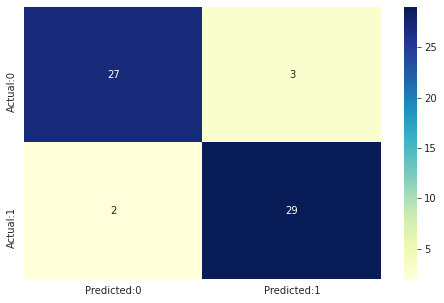

In [155]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

The confusion matrix shows 27+29 = 56 correct predictions and 2+3= 5 incorrect ones.

True Positives: 29

True Negatives: 27

False Positives: 3 (Type I error)

False Negatives: 2 ( Type II error)

**Confusion Matrix**

In [160]:
#confusion matrix
# precision(positive predictive value)
# Precision= TP/(TP+FP)
#recall kown as sensitivity or true positive rate 
#recall = TP/(TP+FN)
# f1-score, it is combination of precision and recall
# f1-score= 2 * ((precision *recall)/(precision+recall))

from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[27  3]
 [ 2 29]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        30
           1       0.91      0.94      0.92        31

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

0.9180327868852459


A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. 




1.   You need a test dataset or a validation dataset with expected outcome values.
2.   Make a prediction for each row in your test dataset.
From the expected outcomes and predictions count:

*   The number of correct predictions for each class.
*   The number of incorrect predictions for each class, organized by the class that was predicted.


It also allows the visualization of the performance of an algorithm.



the accuracy of Logistic regtression is 92%, till now in tow model ANN and ogistic Regression, we got ANN best but we can also use Regularisation to introduce the penality: lesso (l1) and ridge(l2) to increase the accuracy of Logistic regression

# **Now, we apply 5 algorithms and predict their output.**

In [94]:
#importimg all the algorithens library from sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold,cross_val_score,cross_val_predict

classifiers=[['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Random Forest Classification :',RandomForestClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['Gaussian Naive Bayes :',GaussianNB()]]
cla_pred=[]
acc=[]
for name,model in classifiers:
    model=model
    model.fit(X_train,Y_train) # we are fitting the data into the model with training dataset
    predictions = model.predict(X_test) # now we are predicting with test datset
    cla_pred.append(accuracy_score(Y_test,predictions)) # finding accuracy
    print(name,accuracy_score(Y_test,predictions))
    acc.append(accuracy_score(Y_test,predictions))

Decision Tree Classification : 0.7540983606557377
Random Forest Classification : 0.8688524590163934
K-Neighbors Classification : 0.639344262295082
Support Vector Classification : 0.6885245901639344
Gaussian Naive Bayes : 0.8524590163934426


**Compare all the algorithems with their accuracies in bar plot**

In [0]:
accc={}

accc['A-N Network']=comp_accuracies[0]
accc['Logistic Regression']=comp_accuracies[1]*100
accc['Deceason Tree']=acc[0]*100
accc['Random Forest']=acc[1]*100
accc['K-Neighbours']=acc[2]*100
accc['Support Vector']=acc[3]*100
accc['Gausian Nave Bayes']=acc[4]*100

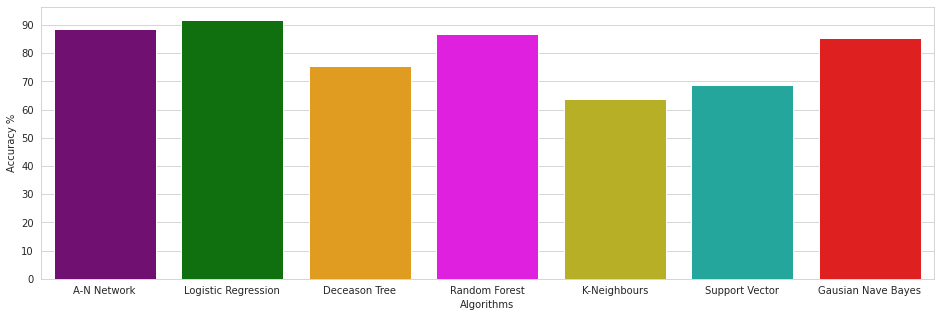

In [184]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accc.keys()), y=list(accc.values()), palette=colors)
plt.show()

So, you can we achieve 91% accuracy in Logistic Regression which is best amoung all other.

**Conclusion**

This dataset is very small but helped us to create a simple model and machine learning techniques. 

ML technologies have become increasingly important and has a greater role in medical devices and Pharma Industry.

## **ThankYou!!!!!**